## Import Packages

In [1]:
import os
import pickle
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from collections import Counter
from tqdm import tqdm

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import StackingClassifier
from scipy.stats import randint
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression


from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from scipy import sparse

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_dir = "/content/drive/MyDrive/大學報告/大數據與商業分析/期中專案/資料集/原始資料集"
%cd -q ../content/drive/MyDrive/大學報告/大數據與商業分析/期中專案/資料集/原始資料集

files = os.listdir(data_dir)
print("View all datasets:")
for f in files:
    print(f)

View all datasets:
bda2024_微股力_個股交易數據-2年.csv
embedding_dict_train.pkl
embedding_dict_test.pkl
data.zipuqogus5ltmp
answers.pkl
news_testing.csv
news_training.csv


## 資料前處理

In [59]:
def load_df(filepath, preview=True):
    print(f"\n----- Loading {filepath}... -----")
    df = pd.read_csv(filepath)
    print(f"Size of dataframe: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    if preview:
        print(df.head())
    return df

In [60]:
'''news1_df = load_df("bda2024_202203-202402_內容數據_新聞1.csv", preview=False)
news2_df = load_df("bda2024_202203-202402_內容數據_新聞2.csv", preview=False)
news3_df = load_df("bda2024_202203-202402_內容數據_新聞3.csv", preview=False)
news_dfs = pd.concat([news1_df, news2_df, news3_df], ignore_index=True) #原本叫news_df'''
news_df = load_df("/content/drive/MyDrive/大學報告/大數據與商業分析/期中專案/資料集/news_filtered_merged.csv", preview=False)

'''disc_dcard_df = load_df("bda2024_202203-202402_討論數據_dcard.csv", preview=False)
disc_dcard_df.rename(columns={'forum': 'p_type'}, inplace=True)    # Repair column name typo in data
disc_m1_df = load_df("bda2024_202203-202402_討論數據_mobile01-1.csv", preview=False)
disc_m2_df = load_df("bda2024_202203-202402_討論數據_mobile01-2.csv", preview=False)
disc_ptt_df = load_df("bda2024_202203-202402_討論數據_ptt.csv", preview=False)
disc_df = pd.concat([disc_dcard_df, disc_m1_df, disc_m2_df, disc_ptt_df], ignore_index=True)'''

transaction_df = load_df("/content/drive/MyDrive/大學報告/大數據與商業分析/期中專案/資料集/原始資料集/bda2024_微股力_個股交易數據-2年.csv")
'''report_df = load_df("bda2024_微股力_財報數據-2年.csv")
chip_df = load_df("bda2024_微股力_籌碼數據-2年.csv")
social_df = load_df("bda2024_微股力_社群PKTD-2年.csv")
transaction_df['stock_symbol'] = transaction_df['stock_symbol'].astype(str)
chip_df['stock_symbol'] = chip_df['stock_symbol'].astype(str)    # Repair mixed data types

print(f"\nnews_df\nSize of dataframe: {news_df.shape}\nColumns: {list(news_df.columns)}")
print(news_df.head())
print(f"\ndisc_df\nSize of dataframe: {disc_df.shape}\nColumns: {list(disc_df.columns)}")
print(disc_df.head())'''


----- Loading /content/drive/MyDrive/大學報告/大數據與商業分析/期中專案/資料集/news_filtered_merged.csv... -----
Size of dataframe: (7933, 18)
Columns: ['id', 'p_type', 's_name', 's_area_name', 'post_time', 'title', 'author', 'content', 'page_url', 'date', 'label_day1', 'label_day2', 'label_day3', 'label_day4', 'label_day5', 'foreign_investor_surplus', 'investment_trust_surplus', 'dealer_surplus']

----- Loading /content/drive/MyDrive/大學報告/大數據與商業分析/期中專案/資料集/原始資料集/bda2024_微股力_個股交易數據-2年.csv... -----


<ipython-input-59-3ba66dfef298>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Size of dataframe: (1154225, 8)
Columns: ['stock_name', 'stock_symbol', 'open', 'high', 'low', 'close', 'volume', 'date']
  stock_name stock_symbol   open   high    low  close  volume  \
0         日馳         1526  47.55  48.45  47.55  48.30     138   
1         日馳         1526  48.30  48.30  47.40  47.95     153   
2         日馳         1526  48.45  48.70  47.80  48.10     120   
3         日馳         1526  47.95  47.95  47.55  47.60     165   
4         日馳         1526  47.65  47.65  45.30  45.65     514   

                  date  
0  2022-03-01 00:00:00  
1  2022-03-02 00:00:00  
2  2022-03-03 00:00:00  
3  2022-03-04 00:00:00  
4  2022-03-07 00:00:00  


'report_df = load_df("bda2024_微股力_財報數據-2年.csv")\nchip_df = load_df("bda2024_微股力_籌碼數據-2年.csv")\nsocial_df = load_df("bda2024_微股力_社群PKTD-2年.csv")\ntransaction_df[\'stock_symbol\'] = transaction_df[\'stock_symbol\'].astype(str)\nchip_df[\'stock_symbol\'] = chip_df[\'stock_symbol\'].astype(str)    # Repair mixed data types\n\nprint(f"\nnews_df\nSize of dataframe: {news_df.shape}\nColumns: {list(news_df.columns)}")\nprint(news_df.head())\nprint(f"\ndisc_df\nSize of dataframe: {disc_df.shape}\nColumns: {list(disc_df.columns)}")\nprint(disc_df.head())'

## 1. 看漲文章、看跌文章
以 2023 年 1 月至 3 月、2023 年 4 月緯創和聯電的新聞分別做為訓練資料和測試資料。

### a. 處理股價資訊

1. 透過個股交易數據計算 label，處理資料時需注意股票開休市日期。\
舉例：[1, 2, 7, 9, 13, 14, 17]，Day 8 的新聞會用 Day 9 - 14 的漲跌資訊標記。

2. 需注意設定股價變化的 threshold，太高會使 y 中有許多數值為 0、太低則可能需要頻繁地交易，扣除手續費後便無利可圖。

In [61]:
stock_names = ["台船","長榮","新興","裕民","榮運","嘉里大榮","陽明","華航","志信","中航","中櫃","萬海","台航","長榮航","亞航","台灣高鐵","漢翔","台驊投控","慧洋-KY","宅配通","遠雄港","建新國際"]
dates_train = (datetime(2023, 1, 1).date(), datetime(2023, 3, 31).date())
dates_test = (datetime(2023, 4, 1).date(), datetime(2023, 4, 30).date())

In [7]:
# 文字前處理
# 先把我們需要的函數載入
ws = WS("/content/drive/MyDrive/大學報告/大數據與商業分析/期中專案/資料集/data (2)/data") # 斷詞
pos = POS("/content/drive/MyDrive/大學報告/大數據與商業分析/期中專案/資料集/data (2)/data") # 詞性標注
ner = NER("/content/drive/MyDrive/大學報告/大數據與商業分析/期中專案/資料集/data (2)/data") # 命名實體識別

def word_segmentation(contents, ws):
    word_sentence_list = ws(contents,
                        sentence_segmentation=True,
                        segment_delimiter_set={'?', '？', '!', '！', '。', ',','，', ';', ':', '、', ' ', '.'})
    # 標點符號
    punc = ['，', '。', '、', '：', '；', '？', '！', '「', '」', '（', '）', '『', '』', '—', '－', '～', '…', '‧', '《', '》', '〈', '〉', '﹏﹏']
    eng_punc = [',', '.', ':', ';', '?', '!', '(', ')', '[', ']', '&', '@', '#', '$', '%', '-', '_', '*', '/', '\\', '+', '=', '>', '<', '"', "'", '’', '‘', '“', '”', ' ']
    # 停用詞
    stop_words = ['全文', '日', '月', '年', 'br', '中央社', '公司', '上午', '下午', '日期']

    word_sentence_list = [[word for word in sentence if not any(char.isdigit() for char in word)] for sentence in word_sentence_list]
    word_sentence_list = [[word for word in sentence if word not in punc] for sentence in word_sentence_list]
    word_sentence_list = [[word for word in sentence if word not in eng_punc] for sentence in word_sentence_list]
    word_sentence_list = [[word for word in sentence if word not in stop_words] for sentence in word_sentence_list]

    return word_sentence_list

def preprocessing(df, days, ws):
    df = df[df['label_day' + str(days)] != -1]  # 把标签为 -1 的 row 全部移除
    ids = df['id'].tolist()  # 提取 id 列
    Y = lambda df, days: df['label_day' + str(days)].tolist()  # 提取标签
    contents = df['content'].tolist()  # 提取正文内容

    # 对正文内容进行分词
    word_sentence_list = word_segmentation(contents, ws)

    # 取得 1-gram - 3-gram 的 tf-idf 特征
    tv = TfidfVectorizer(ngram_range=(1, 3))
    tfidf = tv.fit_transform([' '.join(sentence) for sentence in word_sentence_list])

    # 取得前 1000 个特征
    ch2 = SelectKBest(chi2, k=1000)
    X = ch2.fit_transform(tfidf, Y(df, days))

    # 将 foreign_investor_surplus, investment_trust_surplus, dealer_surplus 加入到 X
    X = sparse.hstack((X, sparse.csr_matrix(df[['foreign_investor_surplus', 'investment_trust_surplus', 'dealer_surplus']])))

    # 转换 X 为稠密格式并构建结果字典
    X_dense = X.todense()
    results = {id_value: X_dense[i].tolist()[0] for i, id_value in enumerate(ids)}

    return results, Y(df, days)

/usr/local/lib/python3.10/dist-packages/ckiptagger/model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
/usr/local/lib/python3.10/dist-packages/ckiptagger/model_pos.py:56: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
/usr/local/lib/python3.10/dist-packages/ckiptagger/model_ner.py:57: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)


In [98]:
%cd -q ../bda2024_mid_demo
#轉化資料型態
transaction_df['date'] = pd.to_datetime(transaction_df['date']).dt.date
news_df['post_time'] = pd.to_datetime(news_df['post_time'])
news_df['post_time'] = news_df['post_time'].dt.date

#找到给定日期的下一个交易日
def get_next_date(input_date, dates_list):
    index = sum(1 for d in dates_list if d < input_date)
    return index, dates_list[index]

def check_contained_option(title, options):
    for option in options:
        if option in title:
            return option
    return None

def print_logs(func):
    def wrapper(*args, **kwargs):
        print(f"Executing {func.__name__} ......")
        return func(*args, **kwargs)
    return wrapper

#接口二：這邊是讀bert跑出來的embedding
def load_news_embeddings():
    with open('/content/drive/MyDrive/大學報告/大數據與商業分析/期中專案/embedding_dict_train (2).pkl', 'rb') as f:
        embedding_dict_train = pickle.load(f)
    with open('/content/drive/MyDrive/大學報告/大數據與商業分析/期中專案/embedding_dict_test (1).pkl', 'rb') as f:
        embedding_dict_test = pickle.load(f)
    print(f"Size of <embedding_dict_train>: {len(embedding_dict_train)}")
    print(f"Size of <embedding_dict_test>: {len(embedding_dict_test)}")
    return embedding_dict_train, embedding_dict_test
    '''embedding_dict_train, _ = preprocessing(news_df_train,1,ws)
    embedding_dict_test, _ = preprocessing(news_df_test,1,ws)
    return embedding_dict_train, embedding_dict_test'''

class NewsPriceDataset:
    """
    Description
        Prepare training and testing dataset for stock trading.
        X: News embeddings, y: Change in stock price

    Strategies
        1. y discrete, news categorized as decrease (-1; sell), stable (0; hold), increase (+1; buy) sets.
        # 2. y continuous, trade if predicted price change is greater than given threshold.

    Parameters
        stock_names: Name of the stocks to trade.
        dates_train: (start_date, end_date), dates covered in the training set.
        dates_test:  (start_date, end_date), dates covered in the testing set.
        n_days_after, threshold: If the predicted price change in <n_days_after> days is greater than <threshold>, make a transaction. 交易門檻
    """
    def __init__(self, stock_names, dates_train, dates_test, n_days_after, threshold):
        self.stock_names = stock_names
        self.dates_train_start, self.dates_train_end = dates_train
        self.dates_test_start, self.dates_test_end = dates_test
        self.dates_list = sorted(transaction_df.loc[(transaction_df['stock_name']==self.stock_names[0])]['date'])

        self.n_days_after = n_days_after
        self.threshold = threshold
        self.answers = self.get_answers()
        self.news_by_date = {}

        self.embedding_dict = {}
        self.X_train, self.y_train = [], []
        self.X_test, self.y_test = [], []

    def __str__(self):
        return f"NewsPriceDataset for {self.stock_names} (n_days_after={self.n_days_after}, threshold={self.threshold})\n\
                 X_train: {np.shape(self.X_train)}, y_train: {np.shape(self.y_train)}\n\
                 X_test: {np.shape(self.X_test)}, y_test: {np.shape(self.y_test)}"


    #给定一个股票名称和一个日期，这个函数计算从输入日期起指定天数后的股票开盘价和收盘价的变化，并根据这一变化提供买入、卖出或持有的建议
    def get_answer(self, stock_name, input_date):
        i, _ = get_next_date(input_date, self.dates_list)
        open_date, close_date = self.dates_list[i], self.dates_list[i + self.n_days_after]

        open_price = transaction_df.loc[(transaction_df['date']==open_date) &
                                        (transaction_df['stock_name']==stock_name)]['open'].iloc[0]
        close_price = transaction_df.loc[(transaction_df['date']==close_date) &
                                        (transaction_df['stock_name']==stock_name)]['close'].iloc[0]
        price_change = (close_price - open_price) / open_price
        print(f"{stock_name:5} | {price_change:5.2f} (Open: {open_date}, {open_price} | Close: {close_date}, {close_price})")

        if price_change >= self.threshold:
            return 1     # buy
        elif price_change <= -self.threshold:
            return -1    # sell
        else:
            return 0     # hold

    #计算并返回一个包含所有股票在所有指定日期内交易建议的字典
    @print_logs
    def get_answers(self):
        if os.path.exists("answers.pkl"):
            with open('answers.pkl', 'rb') as f:
                answers = pickle.load(f)
        else:
            answers = {}
            final_day = self.dates_test_end + timedelta(days=30)
            dates_used = [date for date in self.dates_list if self.dates_train_start <= date <= final_day]
            for d in dates_used:
                for n in self.stock_names:
                    answers[(n, d)] = self.get_answer(n, d)
            with open('answers.pkl', 'wb') as f:
                pickle.dump(answers, f)
        return answers

    #接口一：跑出吐向量用的資料集給Martin
    #篩選新聞的日期範圍與確認不是空值，並把篩選完的資料集存成兩個csv檔
    def export_news_csv(self):
        news_df['stock_name'] = news_df['title'].apply(check_contained_option, options=self.stock_names)

        news_df_train = news_df[(news_df['post_time'] >= self.dates_train_start) &
                                (news_df['post_time'] <= self.dates_train_end) &
                                (news_df['stock_name'].notna())]
        news_df_test = news_df[(news_df['post_time'] >= self.dates_test_start) &
                               (news_df['post_time'] <= self.dates_test_end) &
                               (news_df['stock_name'].notna())]
        print(f"Size of <news_df_train>: {news_df_train.shape}")
        print(f"Size of <news_df_test>: {news_df_test.shape}")
        news_df_train.to_csv("news_training.csv", index=False)
        news_df_test.to_csv("news_testing.csv", index=False)
        return news_df_train, news_df_test

    def prepare_dataset(self, embedding_dict):
        X = np.atleast_2d(list(embedding_dict.values()))
        y = []
        for key in tqdm(embedding_dict):
            input_date = next(iter(news_df.loc[news_df['id']==key, 'post_time']))
            stock_name = next(iter(news_df.loc[news_df['id']==key, 'stock_name']))
            _, next_date = get_next_date(input_date, self.dates_list)
            y.append(self.answers[(stock_name, next_date)])
        y = np.array(y)
        return X, y

    #準備訓練和測試的資料
    def prepare_main(self):
        embedding_dict_train, embedding_dict_test = load_news_embeddings()
        self.X_train, self.y_train = self.prepare_dataset(embedding_dict_train)
        self.X_test, self.y_test = self.prepare_dataset(embedding_dict_test)

        self.embedding_dict = {**embedding_dict_train, **embedding_dict_test}
        self.update_news_by_date(self.embedding_dict)

    @print_logs
    def update_news_by_date(self, embedding_dict):
        for key in tqdm(embedding_dict):
            input_date = next(iter(news_df.loc[news_df['id']==key, 'post_time']))
            if input_date in self.news_by_date:
                self.news_by_date[input_date].append(key)
            else:
                self.news_by_date[input_date] = [key]
        return self.news_by_date


    #考慮給訂日期前五天的新聞，用來預測y
    def get_test_batch(self, stock_name, input_date, n_days=2):
        """
            Predict the price change with news in the timespan (input_date - n_days, input_date)
        """
        '''i, _ = get_next_date(input_date, self.dates_list)
        news_id_list = []
        for k in range(n_days + 1):
            for news_id in self.news_by_date[self.dates_list[i - k]]:                   # given date range
                if next(iter(news_df.loc[news_df['id']==news_id, 'stock_name']))==stock_name:       # given stock
                    news_id_list.append(news_id)

        if len(news_id_list)==0:
            return None
        else:
            sub_dict = {key: self.embedding_dict[key] for key in news_id_list if key in self.embedding_dict}
            return self.prepare_dataset(sub_dict)
        '''
        i, _ = get_next_date(input_date, self.dates_list)
        news_id_list = []
        for k in range(n_days + 1):
            check_date = self.dates_list[i - k]
            if check_date in self.news_by_date:  # 检查日期是否存在于字典中
                for news_id in self.news_by_date[check_date]:  # 安全地访问日期键
                    if next(iter(news_df.loc[news_df['id'] == news_id, 'stock_name'])) == stock_name:
                        news_id_list.append(news_id)
            else:
                print(f"Date {check_date} not found in news_by_date.")  # 为避免 KeyError，报告丢失的日期

        if len(news_id_list) == 0:
            return None
        else:
            sub_dict = {key: self.embedding_dict[key] for key in news_id_list if key in self.embedding_dict}
            return self.prepare_dataset(sub_dict)

    def backtest(self, model):
        """
            For data in the test date range, predict the price change with the given model.
        """
        i, _ = get_next_date(self.dates_test_start, self.dates_list)
        z_test, z_test_pred = [], []
        while self.dates_list[i] <= self.dates_test_end:
            d = self.dates_list[i]
            for n in self.stock_names:
                if self.get_test_batch(n, d) is None:
                    continue
                else:
                    X_test, y_test = self.get_test_batch(n, d)
                    y_test_pred = model.predict(X_test)
                    price_change_pred = 1 if sum(y_test_pred) > 0 else 0 if sum(y_test_pred) == 0 else -1
                    price_change_true = self.answers[(n, d)]

                    z_test.append(price_change_true)
                    z_test_pred.append(price_change_pred)
                    print(f"{d}, {n:5} | Ground Truth: {price_change_true}, Prediction: {price_change_pred}")
            i += 1
        return z_test, z_test_pred

[Errno 2] No such file or directory: '../bda2024_mid_demo'


### b. 準備訓練及測試資料
X: 新聞, y: 股價變化（-1: 下跌, 0: 持平, 1: 上漲）

In [99]:
#因為init時有呼叫get_answers，所以下方會跑出get_answers要生成的東西
dataset = NewsPriceDataset(stock_names, dates_train, dates_test, 5, 0.03)
news_df_train, news_df_test = dataset.export_news_csv()

Executing get_answers ......
Size of <news_df_train>: (707, 19)
Size of <news_df_test>: (221, 19)


在 [Google Colab](https://colab.research.google.com/drive/1dFeoGUoa0xgbRA7TsLwkg54tYguhlN4k?usp=sharing) 上使用現有的預訓練模型進行 inference，取得新聞標題的 embedding。（這裡以 `bert-base-chinese` 為例）

In [100]:
dataset.prepare_main()
print(dataset)

Size of <embedding_dict_train>: 288
Size of <embedding_dict_test>: 192



100%|██████████| 288/288 [00:00<00:00, 400.95it/s]

100%|██████████| 192/192 [00:00<00:00, 378.34it/s]


Executing update_news_by_date ......



100%|██████████| 480/480 [00:00<00:00, 798.68it/s]

NewsPriceDataset for ['台船', '長榮', '新興', '裕民', '榮運', '嘉里大榮', '陽明', '華航', '志信', '中航', '中櫃', '萬海', '台航', '長榮航', '亞航', '台灣高鐵', '漢翔', '台驊投控', '慧洋-KY', '宅配通', '遠雄港', '建新國際'] (n_days_after=5, threshold=0.03)
                 X_train: (288, 1003), y_train: (288,)
                 X_test: (192, 1003), y_test: (192,)


In [101]:
X_train, y_train = dataset.X_train, dataset.y_train
X_test, y_test = dataset.X_test, dataset.y_test
'''
embedding_dict_train, _ = preprocessing(news_df_train,1,ws)
all_embeddings = list(embedding_dict_train.values())
X_train = np.array(all_embeddings)

embedding_dict_test, _ = preprocessing(news_df_test,1,ws)
all_embeddings = list(embedding_dict_test.values())
X_test = np.array(all_embeddings)
'''
counts = Counter(y_test)
for value, count in counts.items():
    print(f"{str(value).rjust(3)}: {count}")

  1: 51
  0: 78
 -1: 63


In [91]:
X_train.shape,y_train.shape

((288, 1003), (288,))

### c. 訓練模型

In [102]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# 创建模型实例
xgb_model = XGBClassifier(
    learning_rate=0.2,
    max_depth=4,
    n_estimators=300,
    subsample=1.0
)

svm_model = SVC(
    kernel='rbf',
    gamma='scale',
    C=10
)

rf_model = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=1,
    max_depth=None
)

nb_model = GaussianNB()  # 朴素贝叶斯模型通常不需要配置

# 定义Stacking模型
stacked_model = StackingClassifier(
    estimators=[
        ('xgboost', xgb_model),
        ('svm', svm_model),
        ('random_forest', rf_model),
        ('naive_bayes', nb_model)
    ],
    final_estimator=LogisticRegression()
)

# 训练Stacking模型
stacked_model.fit(X_train, y_train)

# 预测和评估Stacking模型
stacked_pred = stacked_model.predict(X_test)
print("Stacked Model Accuracy:", accuracy_score(y_test, stacked_pred))
print("Stacked Model Classification Report:\n", classification_report(y_test, stacked_pred))

Stacked Model Accuracy: 0.4166666666666667
Stacked Model Classification Report:
               precision    recall  f1-score   support

          -1       0.47      0.27      0.34        63
           0       0.40      0.81      0.54        78
           1       0.00      0.00      0.00        51

    accuracy                           0.42       192
   macro avg       0.29      0.36      0.29       192
weighted avg       0.32      0.42      0.33       192



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [93]:
model = MLPClassifier(hidden_layer_sizes=(180, 36), max_iter=300)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.3542


In [94]:
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.3438


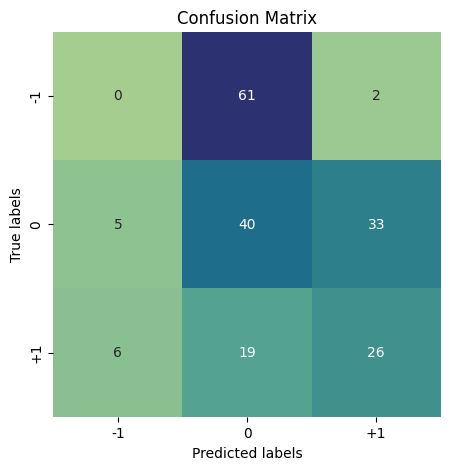

In [21]:
cm = confusion_matrix(y_test, y_test_pred)
class_labels = ['-1', '0', '+1']

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap="crest", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

### d. 預測：根據模型的預測結果決定是否買進或賣出。

In [103]:
z_test, z_test_pred = dataset.backtest(stacked_model)

Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 118.04it/s]


Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 239.36it/s]


2023-04-06, 台船    | Ground Truth: 1, Prediction: 0
Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.



100%|██████████| 5/5 [00:00<00:00, 221.33it/s]


Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.



100%|██████████| 5/5 [00:00<00:00, 215.22it/s]


2023-04-06, 長榮    | Ground Truth: 1, Prediction: 0
Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 152.92it/s]


Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 197.07it/s]

2023-04-06, 陽明    | Ground Truth: 0, Prediction: 0


Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 159.77it/s]


Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 188.09it/s]


2023-04-06, 華航    | Ground Truth: 0, Prediction: 0
Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 215.81it/s]


Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 217.91it/s]

2023-04-06, 台驊投控  | Ground Truth: 0, Prediction: 0
Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.


Date 2023-03-31 not found in news_by_date.
Date 2023-03-30 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 140.92it/s]


Date 2023-03-31 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 242.63it/s]

2023-04-07, 台船    | Ground Truth: 1, Prediction: 0


Date 2023-03-31 not found in news_by_date.



100%|██████████| 11/11 [00:00<00:00, 203.48it/s]


Date 2023-03-31 not found in news_by_date.



100%|██████████| 11/11 [00:00<00:00, 180.64it/s]


2023-04-07, 長榮    | Ground Truth: 1, Prediction: 0
Date 2023-03-31 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 150.78it/s]


Date 2023-03-31 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 174.36it/s]


2023-04-07, 陽明    | Ground Truth: 1, Prediction: 0
Date 2023-03-31 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 150.22it/s]


Date 2023-03-31 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 212.69it/s]

2023-04-07, 華航    | Ground Truth: 0, Prediction: 0


Date 2023-03-31 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 185.72it/s]


Date 2023-03-31 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 200.31it/s]


2023-04-07, 漢翔    | Ground Truth: 1, Prediction: 0
Date 2023-03-31 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 207.42it/s]


Date 2023-03-31 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 242.67it/s]

2023-04-07, 台驊投控  | Ground Truth: 0, Prediction: 0


Date 2023-03-31 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 127.43it/s]


Date 2023-03-31 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 214.59it/s]


2023-04-07, 慧洋-KY | Ground Truth: 0, Prediction: 0
Date 2023-03-31 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-03-31 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 205.72it/s]

Date 2023-04-10 not found in news_by_date.




100%|██████████| 1/1 [00:00<00:00, 140.74it/s]

2023-04-10, 台船    | Ground Truth: 1, Prediction: 0
Date 2023-04-10 not found in news_by_date.




100%|██████████| 11/11 [00:00<00:00, 197.99it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 11/11 [00:00<00:00, 219.73it/s]


2023-04-10, 長榮    | Ground Truth: 1, Prediction: 0
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 190.21it/s]

Date 2023-04-10 not found in news_by_date.




100%|██████████| 3/3 [00:00<00:00, 190.13it/s]


2023-04-10, 陽明    | Ground Truth: 0, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 98.76it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 111.90it/s]

2023-04-10, 華航    | Ground Truth: 0, Prediction: 0
Date 2023-04-10 not found in news_by_date.


Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 147.34it/s]

Date 2023-04-10 not found in news_by_date.




100%|██████████| 2/2 [00:00<00:00, 185.65it/s]


2023-04-10, 漢翔    | Ground Truth: 1, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 196.45it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 190.68it/s]


2023-04-10, 台驊投控  | Ground Truth: 0, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 179.37it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 190.25it/s]


2023-04-10, 慧洋-KY | Ground Truth: 0, Prediction: 0
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 296.33it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 295.47it/s]


2023-04-11, 台船    | Ground Truth: 1, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 9/9 [00:00<00:00, 213.47it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 9/9 [00:00<00:00, 328.05it/s]


2023-04-11, 長榮    | Ground Truth: 1, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 167.73it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 165.25it/s]


2023-04-11, 新興    | Ground Truth: -1, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 205.91it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 180.12it/s]


2023-04-11, 裕民    | Ground Truth: 0, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 117.71it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 117.19it/s]


2023-04-11, 榮運    | Ground Truth: 0, Prediction: 0
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 257.17it/s]

Date 2023-04-10 not found in news_by_date.




100%|██████████| 3/3 [00:00<00:00, 157.16it/s]


2023-04-11, 陽明    | Ground Truth: 0, Prediction: 0
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 186.57it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 113.20it/s]


2023-04-11, 中航    | Ground Truth: 0, Prediction: 0
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 204.92it/s]

Date 2023-04-10 not found in news_by_date.




100%|██████████| 1/1 [00:00<00:00, 160.27it/s]


2023-04-11, 亞航    | Ground Truth: 1, Prediction: 0
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.



100%|██████████| 4/4 [00:00<00:00, 198.36it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 4/4 [00:00<00:00, 155.23it/s]


2023-04-11, 漢翔    | Ground Truth: 1, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 216.97it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 230.85it/s]


2023-04-11, 台驊投控  | Ground Truth: 0, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 235.45it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 147.76it/s]


2023-04-11, 慧洋-KY | Ground Truth: 0, Prediction: 0
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 152.64it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 194.81it/s]


2023-04-11, 遠雄港   | Ground Truth: 1, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 229.17it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 249.65it/s]


2023-04-11, 建新國際  | Ground Truth: 0, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 4/4 [00:00<00:00, 177.08it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 4/4 [00:00<00:00, 229.37it/s]


2023-04-12, 台船    | Ground Truth: 1, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 9/9 [00:00<00:00, 255.91it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 9/9 [00:00<00:00, 227.73it/s]

2023-04-12, 長榮    | Ground Truth: 0, Prediction: 0


Date 2023-04-10 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 147.16it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 271.00it/s]

2023-04-12, 新興    | Ground Truth: -1, Prediction: 0


Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 104.39it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 200.96it/s]


2023-04-12, 裕民    | Ground Truth: 0, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 259.81it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 129.32it/s]

2023-04-12, 榮運    | Ground Truth: 0, Prediction: 0


Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 92.60it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 132.97it/s]


2023-04-12, 嘉里大榮  | Ground Truth: 0, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 4/4 [00:00<00:00, 241.73it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 4/4 [00:00<00:00, 225.62it/s]


2023-04-12, 陽明    | Ground Truth: 0, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 4/4 [00:00<00:00, 350.07it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 4/4 [00:00<00:00, 150.26it/s]

2023-04-12, 華航    | Ground Truth: 0, Prediction: 0


Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 207.09it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 183.71it/s]


2023-04-12, 志信    | Ground Truth: 0, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 216.88it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 205.44it/s]


2023-04-12, 中航    | Ground Truth: 0, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 200.12it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 219.37it/s]


2023-04-12, 中櫃    | Ground Truth: 0, Prediction: -1
Date 2023-04-10 not found in news_by_date.



100%|██████████| 4/4 [00:00<00:00, 241.83it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 4/4 [00:00<00:00, 258.06it/s]


2023-04-12, 萬海    | Ground Truth: 0, Prediction: -1
Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 241.94it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 186.16it/s]


2023-04-12, 台航    | Ground Truth: 0, Prediction: 0
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 259.55it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 100.96it/s]

2023-04-12, 亞航    | Ground Truth: 1, Prediction: 0


Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.



100%|██████████| 9/9 [00:00<00:00, 342.15it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 9/9 [00:00<00:00, 318.33it/s]


2023-04-12, 漢翔    | Ground Truth: 1, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 129.35it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 170.06it/s]


2023-04-12, 台驊投控  | Ground Truth: 0, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 186.73it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 154.34it/s]


2023-04-12, 慧洋-KY | Ground Truth: -1, Prediction: 0
Date 2023-04-10 not found in news_by_date.
Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 76.44it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 147.59it/s]


2023-04-12, 遠雄港   | Ground Truth: 1, Prediction: 0
Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 237.97it/s]


Date 2023-04-10 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 147.22it/s]


2023-04-12, 建新國際  | Ground Truth: 1, Prediction: 0



100%|██████████| 5/5 [00:00<00:00, 252.89it/s]

100%|██████████| 5/5 [00:00<00:00, 386.07it/s]

2023-04-13, 台船    | Ground Truth: 1, Prediction: 0




100%|██████████| 14/14 [00:00<00:00, 450.23it/s]

100%|██████████| 14/14 [00:00<00:00, 382.01it/s]


2023-04-13, 長榮    | Ground Truth: 0, Prediction: -1



100%|██████████| 3/3 [00:00<00:00, 155.52it/s]

100%|██████████| 3/3 [00:00<00:00, 273.96it/s]


2023-04-13, 新興    | Ground Truth: -1, Prediction: 0



100%|██████████| 1/1 [00:00<00:00, 237.57it/s]

100%|██████████| 1/1 [00:00<00:00, 238.46it/s]

2023-04-13, 裕民    | Ground Truth: 0, Prediction: 0




100%|██████████| 2/2 [00:00<00:00, 329.78it/s]

100%|██████████| 2/2 [00:00<00:00, 153.81it/s]

2023-04-13, 榮運    | Ground Truth: 0, Prediction: 0




100%|██████████| 1/1 [00:00<00:00, 209.60it/s]

100%|██████████| 1/1 [00:00<00:00, 152.19it/s]


2023-04-13, 嘉里大榮  | Ground Truth: 0, Prediction: 0



100%|██████████| 6/6 [00:00<00:00, 286.81it/s]

100%|██████████| 6/6 [00:00<00:00, 383.20it/s]


2023-04-13, 陽明    | Ground Truth: 0, Prediction: 0



100%|██████████| 6/6 [00:00<00:00, 162.61it/s]

100%|██████████| 6/6 [00:00<00:00, 364.92it/s]


2023-04-13, 華航    | Ground Truth: 0, Prediction: -1



100%|██████████| 1/1 [00:00<00:00, 137.45it/s]

100%|██████████| 1/1 [00:00<00:00, 206.53it/s]


2023-04-13, 志信    | Ground Truth: 0, Prediction: 0



100%|██████████| 1/1 [00:00<00:00, 159.53it/s]

100%|██████████| 1/1 [00:00<00:00, 177.73it/s]

2023-04-13, 中航    | Ground Truth: 0, Prediction: 0




100%|██████████| 1/1 [00:00<00:00, 215.52it/s]

100%|██████████| 1/1 [00:00<00:00, 226.19it/s]

2023-04-13, 中櫃    | Ground Truth: 0, Prediction: -1




100%|██████████| 4/4 [00:00<00:00, 377.89it/s]

100%|██████████| 4/4 [00:00<00:00, 318.21it/s]

2023-04-13, 萬海    | Ground Truth: 0, Prediction: -1




100%|██████████| 1/1 [00:00<00:00, 181.59it/s]

100%|██████████| 1/1 [00:00<00:00, 147.59it/s]


2023-04-13, 台航    | Ground Truth: 0, Prediction: 0



100%|██████████| 1/1 [00:00<00:00, 229.71it/s]

100%|██████████| 1/1 [00:00<00:00, 201.66it/s]


2023-04-13, 亞航    | Ground Truth: 1, Prediction: 0



100%|██████████| 16/16 [00:00<00:00, 228.23it/s]

100%|██████████| 16/16 [00:00<00:00, 239.35it/s]


2023-04-13, 漢翔    | Ground Truth: 1, Prediction: -1



100%|██████████| 2/2 [00:00<00:00, 197.57it/s]

100%|██████████| 2/2 [00:00<00:00, 203.70it/s]


2023-04-13, 台驊投控  | Ground Truth: 0, Prediction: 0



100%|██████████| 2/2 [00:00<00:00, 120.82it/s]

100%|██████████| 2/2 [00:00<00:00, 135.00it/s]


2023-04-13, 慧洋-KY | Ground Truth: -1, Prediction: -1



100%|██████████| 1/1 [00:00<00:00, 186.77it/s]

100%|██████████| 1/1 [00:00<00:00, 113.11it/s]


2023-04-13, 遠雄港   | Ground Truth: 1, Prediction: 0



100%|██████████| 1/1 [00:00<00:00, 213.45it/s]

100%|██████████| 1/1 [00:00<00:00, 234.88it/s]


2023-04-13, 建新國際  | Ground Truth: 0, Prediction: 0



100%|██████████| 3/3 [00:00<00:00, 136.04it/s]

100%|██████████| 3/3 [00:00<00:00, 184.03it/s]


2023-04-14, 台船    | Ground Truth: -1, Prediction: 0



100%|██████████| 18/18 [00:00<00:00, 265.13it/s]

100%|██████████| 18/18 [00:00<00:00, 206.01it/s]


2023-04-14, 長榮    | Ground Truth: 0, Prediction: -1



100%|██████████| 1/1 [00:00<00:00, 113.74it/s]

100%|██████████| 1/1 [00:00<00:00, 202.25it/s]


2023-04-14, 新興    | Ground Truth: -1, Prediction: 0



100%|██████████| 2/2 [00:00<00:00, 202.94it/s]

100%|██████████| 2/2 [00:00<00:00, 130.42it/s]


2023-04-14, 榮運    | Ground Truth: -1, Prediction: 0



100%|██████████| 1/1 [00:00<00:00, 130.50it/s]

100%|██████████| 1/1 [00:00<00:00, 115.21it/s]


2023-04-14, 嘉里大榮  | Ground Truth: 0, Prediction: 0



100%|██████████| 5/5 [00:00<00:00, 183.65it/s]

100%|██████████| 5/5 [00:00<00:00, 230.00it/s]


2023-04-14, 陽明    | Ground Truth: 0, Prediction: 0



100%|██████████| 8/8 [00:00<00:00, 189.56it/s]

100%|██████████| 8/8 [00:00<00:00, 266.66it/s]


2023-04-14, 華航    | Ground Truth: -1, Prediction: -1



100%|██████████| 1/1 [00:00<00:00, 241.70it/s]

100%|██████████| 1/1 [00:00<00:00, 232.78it/s]


2023-04-14, 志信    | Ground Truth: -1, Prediction: 0



100%|██████████| 1/1 [00:00<00:00, 199.64it/s]

100%|██████████| 1/1 [00:00<00:00, 235.49it/s]


2023-04-14, 中櫃    | Ground Truth: 0, Prediction: -1



100%|██████████| 4/4 [00:00<00:00, 193.39it/s]

100%|██████████| 4/4 [00:00<00:00, 244.22it/s]


2023-04-14, 萬海    | Ground Truth: -1, Prediction: -1



100%|██████████| 1/1 [00:00<00:00, 190.30it/s]

100%|██████████| 1/1 [00:00<00:00, 246.96it/s]


2023-04-14, 台航    | Ground Truth: -1, Prediction: 0



100%|██████████| 19/19 [00:00<00:00, 409.15it/s]

100%|██████████| 19/19 [00:00<00:00, 368.93it/s]


2023-04-14, 漢翔    | Ground Truth: 0, Prediction: -1



100%|██████████| 3/3 [00:00<00:00, 180.05it/s]

100%|██████████| 3/3 [00:00<00:00, 288.69it/s]

2023-04-14, 慧洋-KY | Ground Truth: -1, Prediction: -1




100%|██████████| 4/4 [00:00<00:00, 335.60it/s]

100%|██████████| 4/4 [00:00<00:00, 280.31it/s]


2023-04-17, 台船    | Ground Truth: 0, Prediction: -1



100%|██████████| 16/16 [00:00<00:00, 342.90it/s]

100%|██████████| 16/16 [00:00<00:00, 396.33it/s]


2023-04-17, 長榮    | Ground Truth: -1, Prediction: -1



100%|██████████| 3/3 [00:00<00:00, 208.36it/s]

100%|██████████| 3/3 [00:00<00:00, 273.21it/s]

2023-04-17, 新興    | Ground Truth: -1, Prediction: -1




100%|██████████| 1/1 [00:00<00:00, 140.49it/s]

100%|██████████| 1/1 [00:00<00:00, 201.91it/s]


2023-04-17, 榮運    | Ground Truth: -1, Prediction: 0



100%|██████████| 4/4 [00:00<00:00, 210.38it/s]

100%|██████████| 4/4 [00:00<00:00, 385.84it/s]


2023-04-17, 陽明    | Ground Truth: -1, Prediction: 0



100%|██████████| 4/4 [00:00<00:00, 193.78it/s]

100%|██████████| 4/4 [00:00<00:00, 277.58it/s]


2023-04-17, 華航    | Ground Truth: 0, Prediction: -1



100%|██████████| 1/1 [00:00<00:00, 86.57it/s]

100%|██████████| 1/1 [00:00<00:00, 200.79it/s]


2023-04-17, 亞航    | Ground Truth: 0, Prediction: 0



100%|██████████| 16/16 [00:00<00:00, 282.75it/s]

100%|██████████| 16/16 [00:00<00:00, 376.20it/s]


2023-04-17, 漢翔    | Ground Truth: 1, Prediction: -1



100%|██████████| 3/3 [00:00<00:00, 246.00it/s]

100%|██████████| 3/3 [00:00<00:00, 222.17it/s]


2023-04-17, 慧洋-KY | Ground Truth: -1, Prediction: -1
Date 2023-04-18 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 199.22it/s]


Date 2023-04-18 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 202.13it/s]


2023-04-18, 台船    | Ground Truth: -1, Prediction: -1
Date 2023-04-18 not found in news_by_date.



100%|██████████| 11/11 [00:00<00:00, 301.69it/s]


Date 2023-04-18 not found in news_by_date.



100%|██████████| 11/11 [00:00<00:00, 370.45it/s]

2023-04-18, 長榮    | Ground Truth: -1, Prediction: 0
Date 2023-04-18 not found in news_by_date.




100%|██████████| 3/3 [00:00<00:00, 199.43it/s]


Date 2023-04-18 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 181.98it/s]


2023-04-18, 新興    | Ground Truth: -1, Prediction: -1
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 169.10it/s]


Date 2023-04-18 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 232.81it/s]


2023-04-18, 榮運    | Ground Truth: -1, Prediction: 0
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 222.99it/s]


Date 2023-04-18 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 150.84it/s]


2023-04-18, 陽明    | Ground Truth: -1, Prediction: 0
Date 2023-04-18 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 188.02it/s]


Date 2023-04-18 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 300.73it/s]


2023-04-18, 華航    | Ground Truth: -1, Prediction: 0
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 131.56it/s]


Date 2023-04-18 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 208.88it/s]


2023-04-18, 亞航    | Ground Truth: -1, Prediction: 0
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 9/9 [00:00<00:00, 246.06it/s]


Date 2023-04-18 not found in news_by_date.



100%|██████████| 9/9 [00:00<00:00, 206.68it/s]


2023-04-18, 漢翔    | Ground Truth: 0, Prediction: -1
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 154.18it/s]


Date 2023-04-18 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 128.28it/s]

2023-04-18, 慧洋-KY | Ground Truth: -1, Prediction: 0
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.


Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 124.27it/s]


Date 2023-04-18 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 148.97it/s]


2023-04-19, 台船    | Ground Truth: -1, Prediction: -1
Date 2023-04-18 not found in news_by_date.



100%|██████████| 7/7 [00:00<00:00, 220.08it/s]


Date 2023-04-18 not found in news_by_date.



100%|██████████| 7/7 [00:00<00:00, 264.16it/s]


2023-04-19, 長榮    | Ground Truth: -1, Prediction: 0
Date 2023-04-18 not found in news_by_date.



100%|██████████| 4/4 [00:00<00:00, 207.58it/s]


Date 2023-04-18 not found in news_by_date.



100%|██████████| 4/4 [00:00<00:00, 185.38it/s]


2023-04-19, 新興    | Ground Truth: -1, Prediction: -1
Date 2023-04-18 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 201.93it/s]


Date 2023-04-18 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 209.09it/s]


2023-04-19, 裕民    | Ground Truth: -1, Prediction: -1
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 142.87it/s]


Date 2023-04-18 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 129.36it/s]


2023-04-19, 陽明    | Ground Truth: -1, Prediction: 0
Date 2023-04-18 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 132.49it/s]

Date 2023-04-18 not found in news_by_date.




100%|██████████| 2/2 [00:00<00:00, 123.77it/s]

2023-04-19, 華航    | Ground Truth: -1, Prediction: 0


Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 117.25it/s]


Date 2023-04-18 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 162.10it/s]


2023-04-19, 萬海    | Ground Truth: -1, Prediction: 0
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 194.28it/s]


Date 2023-04-18 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 135.49it/s]


2023-04-19, 亞航    | Ground Truth: -1, Prediction: 0
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 5/5 [00:00<00:00, 220.55it/s]


Date 2023-04-18 not found in news_by_date.



100%|██████████| 5/5 [00:00<00:00, 175.63it/s]

2023-04-19, 漢翔    | Ground Truth: 0, Prediction: -1


Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 89.37it/s]


Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 115.15it/s]


2023-04-20, 台船    | Ground Truth: 0, Prediction: -1
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 156.03it/s]


Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 3/3 [00:00<00:00, 182.29it/s]


2023-04-20, 長榮    | Ground Truth: -1, Prediction: 0
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 170.23it/s]


Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 219.30it/s]


2023-04-20, 新興    | Ground Truth: -1, Prediction: 0
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 190.18it/s]


Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 177.07it/s]


2023-04-20, 裕民    | Ground Truth: -1, Prediction: -1
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 120.81it/s]


Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 206.35it/s]


2023-04-20, 華航    | Ground Truth: -1, Prediction: 0
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 216.66it/s]


Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 189.08it/s]


2023-04-20, 萬海    | Ground Truth: -1, Prediction: 0
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 158.39it/s]


Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 148.51it/s]

2023-04-20, 漢翔    | Ground Truth: 0, Prediction: -1
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-18 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.




100%|██████████| 2/2 [00:00<00:00, 124.13it/s]


Date 2023-04-20 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 163.21it/s]


2023-04-21, 台船    | Ground Truth: 0, Prediction: -1
Date 2023-04-20 not found in news_by_date.



100%|██████████| 5/5 [00:00<00:00, 183.77it/s]


Date 2023-04-20 not found in news_by_date.



100%|██████████| 5/5 [00:00<00:00, 146.38it/s]


2023-04-21, 長榮    | Ground Truth: -1, Prediction: 0
Date 2023-04-20 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 130.22it/s]


Date 2023-04-20 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 65.28it/s]


2023-04-21, 新興    | Ground Truth: -1, Prediction: 0
Date 2023-04-20 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 156.51it/s]


Date 2023-04-20 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 175.76it/s]


2023-04-21, 裕民    | Ground Truth: -1, Prediction: -1
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 156.74it/s]


Date 2023-04-20 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 169.66it/s]

2023-04-21, 華航    | Ground Truth: 0, Prediction: 0
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.


Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 206.32it/s]


Date 2023-04-20 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 224.06it/s]


2023-04-21, 萬海    | Ground Truth: -1, Prediction: 0
Date 2023-04-20 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 234.79it/s]


Date 2023-04-20 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 159.81it/s]


2023-04-21, 台航    | Ground Truth: 0, Prediction: 0
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 153.85it/s]


Date 2023-04-20 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 108.12it/s]

2023-04-21, 漢翔    | Ground Truth: 1, Prediction: -1


Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 166.76it/s]


Date 2023-04-20 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 160.45it/s]

2023-04-24, 台船    | Ground Truth: 0, Prediction: 0


Date 2023-04-20 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 183.59it/s]


Date 2023-04-20 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 145.50it/s]

2023-04-24, 長榮    | Ground Truth: -1, Prediction: 0


Date 2023-04-20 not found in news_by_date.



100%|██████████| 5/5 [00:00<00:00, 234.78it/s]


Date 2023-04-20 not found in news_by_date.



100%|██████████| 5/5 [00:00<00:00, 192.86it/s]


2023-04-24, 新興    | Ground Truth: -1, Prediction: -1
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 214.72it/s]


Date 2023-04-20 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 206.71it/s]

2023-04-24, 陽明    | Ground Truth: -1, Prediction: -1


Date 2023-04-20 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 182.83it/s]


Date 2023-04-20 not found in news_by_date.



100%|██████████| 2/2 [00:00<00:00, 211.59it/s]


2023-04-24, 華航    | Ground Truth: 0, Prediction: -1
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 169.85it/s]


Date 2023-04-20 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 211.76it/s]

2023-04-24, 萬海    | Ground Truth: 0, Prediction: 0


Date 2023-04-20 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 241.16it/s]


Date 2023-04-20 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 119.74it/s]

2023-04-24, 台航    | Ground Truth: 0, Prediction: 0


Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.



100%|██████████| 4/4 [00:00<00:00, 187.30it/s]


Date 2023-04-20 not found in news_by_date.



100%|██████████| 4/4 [00:00<00:00, 198.04it/s]

2023-04-24, 漢翔    | Ground Truth: 1, Prediction: 0
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.


Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.
Date 2023-04-20 not found in news_by_date.



100%|██████████| 1/1 [00:00<00:00, 112.69it/s]

100%|██████████| 1/1 [00:00<00:00, 174.87it/s]


2023-04-25, 台船    | Ground Truth: 0, Prediction: 0



100%|██████████| 3/3 [00:00<00:00, 164.66it/s]

100%|██████████| 3/3 [00:00<00:00, 172.23it/s]


2023-04-25, 長榮    | Ground Truth: -1, Prediction: -1



100%|██████████| 10/10 [00:00<00:00, 198.89it/s]

100%|██████████| 10/10 [00:00<00:00, 183.07it/s]


2023-04-25, 新興    | Ground Truth: -1, Prediction: -1



100%|██████████| 2/2 [00:00<00:00, 227.52it/s]

100%|██████████| 2/2 [00:00<00:00, 233.69it/s]


2023-04-25, 陽明    | Ground Truth: -1, Prediction: -1



100%|██████████| 7/7 [00:00<00:00, 143.15it/s]

100%|██████████| 7/7 [00:00<00:00, 190.17it/s]


2023-04-25, 華航    | Ground Truth: 0, Prediction: -1



100%|██████████| 1/1 [00:00<00:00, 92.81it/s]

100%|██████████| 1/1 [00:00<00:00, 141.58it/s]


2023-04-25, 萬海    | Ground Truth: -1, Prediction: 0



100%|██████████| 1/1 [00:00<00:00, 193.21it/s]

100%|██████████| 1/1 [00:00<00:00, 211.36it/s]


2023-04-25, 台航    | Ground Truth: -1, Prediction: 0



100%|██████████| 4/4 [00:00<00:00, 207.37it/s]

100%|██████████| 4/4 [00:00<00:00, 271.90it/s]


2023-04-25, 漢翔    | Ground Truth: 1, Prediction: 0



100%|██████████| 1/1 [00:00<00:00, 133.79it/s]

100%|██████████| 1/1 [00:00<00:00, 166.35it/s]


2023-04-26, 台船    | Ground Truth: -1, Prediction: 0



100%|██████████| 4/4 [00:00<00:00, 146.80it/s]

100%|██████████| 4/4 [00:00<00:00, 216.28it/s]


2023-04-26, 長榮    | Ground Truth: -1, Prediction: -1



100%|██████████| 15/15 [00:00<00:00, 182.93it/s]

100%|██████████| 15/15 [00:00<00:00, 221.59it/s]


2023-04-26, 新興    | Ground Truth: -1, Prediction: -1



100%|██████████| 3/3 [00:00<00:00, 147.79it/s]

100%|██████████| 3/3 [00:00<00:00, 170.94it/s]


2023-04-26, 陽明    | Ground Truth: -1, Prediction: -1



100%|██████████| 9/9 [00:00<00:00, 231.63it/s]

100%|██████████| 9/9 [00:00<00:00, 195.00it/s]

2023-04-26, 華航    | Ground Truth: 0, Prediction: -1




100%|██████████| 3/3 [00:00<00:00, 237.01it/s]

100%|██████████| 3/3 [00:00<00:00, 210.63it/s]


2023-04-26, 漢翔    | Ground Truth: 0, Prediction: 0



100%|██████████| 1/1 [00:00<00:00, 121.24it/s]

100%|██████████| 1/1 [00:00<00:00, 86.97it/s]


2023-04-26, 建新國際  | Ground Truth: 0, Prediction: 0



100%|██████████| 1/1 [00:00<00:00, 117.49it/s]

100%|██████████| 1/1 [00:00<00:00, 172.75it/s]


2023-04-27, 台船    | Ground Truth: -1, Prediction: 0



100%|██████████| 7/7 [00:00<00:00, 219.21it/s]

100%|██████████| 7/7 [00:00<00:00, 316.38it/s]


2023-04-27, 長榮    | Ground Truth: -1, Prediction: -1



100%|██████████| 12/12 [00:00<00:00, 256.86it/s]

100%|██████████| 12/12 [00:00<00:00, 341.30it/s]


2023-04-27, 新興    | Ground Truth: -1, Prediction: -1



100%|██████████| 4/4 [00:00<00:00, 245.65it/s]

100%|██████████| 4/4 [00:00<00:00, 249.82it/s]


2023-04-27, 陽明    | Ground Truth: 0, Prediction: 0



100%|██████████| 8/8 [00:00<00:00, 208.23it/s]

100%|██████████| 8/8 [00:00<00:00, 263.15it/s]


2023-04-27, 華航    | Ground Truth: 0, Prediction: -1



100%|██████████| 1/1 [00:00<00:00, 177.62it/s]

100%|██████████| 1/1 [00:00<00:00, 203.83it/s]


2023-04-27, 亞航    | Ground Truth: 1, Prediction: 0



100%|██████████| 1/1 [00:00<00:00, 176.38it/s]

100%|██████████| 1/1 [00:00<00:00, 173.51it/s]


2023-04-27, 建新國際  | Ground Truth: 0, Prediction: 0



100%|██████████| 1/1 [00:00<00:00, 149.62it/s]

100%|██████████| 1/1 [00:00<00:00, 205.44it/s]


2023-04-28, 台船    | Ground Truth: -1, Prediction: 0



100%|██████████| 7/7 [00:00<00:00, 278.86it/s]

100%|██████████| 7/7 [00:00<00:00, 389.54it/s]


2023-04-28, 長榮    | Ground Truth: -1, Prediction: 0



100%|██████████| 8/8 [00:00<00:00, 240.71it/s]

100%|██████████| 8/8 [00:00<00:00, 367.84it/s]


2023-04-28, 新興    | Ground Truth: -1, Prediction: 0



100%|██████████| 5/5 [00:00<00:00, 300.94it/s]

100%|██████████| 5/5 [00:00<00:00, 222.42it/s]


2023-04-28, 陽明    | Ground Truth: -1, Prediction: -1



100%|██████████| 3/3 [00:00<00:00, 188.21it/s]

100%|██████████| 3/3 [00:00<00:00, 212.49it/s]


2023-04-28, 華航    | Ground Truth: 0, Prediction: -1



100%|██████████| 1/1 [00:00<00:00, 150.88it/s]

100%|██████████| 1/1 [00:00<00:00, 188.01it/s]


2023-04-28, 亞航    | Ground Truth: 1, Prediction: 0



100%|██████████| 1/1 [00:00<00:00, 235.26it/s]

100%|██████████| 1/1 [00:00<00:00, 184.13it/s]

2023-04-28, 建新國際  | Ground Truth: 0, Prediction: 0


In [ ]:
len(z_test)

Balanced accuracy: 0.3692


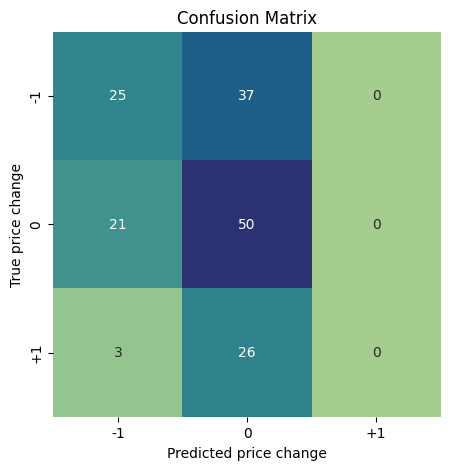

In [104]:
accuracy = balanced_accuracy_score(z_test, z_test_pred)
print(f"Balanced accuracy: {accuracy:.4f}")

cm = confusion_matrix(z_test, z_test_pred)
class_labels = ['-1', '0', '+1']

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap="crest", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted price change")
plt.ylabel("True price change")
plt.title("Confusion Matrix")
plt.show()

## 2. 其他參考方向

- 文章分類規則、同時使用新聞及社群討論資訊

- 以股價資訊、交易量、技術指標 (TA-Lib) 預測未來價格走勢

- 使用籌碼面資訊（e.g., 外資連買）、財報資訊（e.g., 長期而言，EPS 和股價呈正相關）進行綜合評估

## Playground

In [ ]:
print(list(transaction_df['stock_symbol'])[:100])

In [ ]:
print(list(disc_df.columns))
print('\n', disc_df["p_type"].value_counts())
print('\n', disc_df["s_name"].value_counts())
print('\n', disc_df["content_type"].value_counts())

In [ ]:
print(disc_df.loc[disc_df['s_name']=="Ptt"].iloc[0])